In [1]:
import random, matplotlib.pyplot as plt

class Environment:
    def __init__(self, width, height, resources):
        self.width = width
        self.height = height
        self.resources = resources
        self.agents = []

    def add_agent(self, agent):
        self.agents.append(agent)

    def step(self):
        for agent in self.agents:
            agent.move()
            agent.collect(self.resources)


In [2]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.x = random.randint(0, env.width - 1)
        self.y = random.randint(0, env.height - 1)
        self.energy = 50

    def move(self):
        self.x = (self.x + random.choice([-1, 0, 1])) % self.env.width
        self.y = (self.y + random.choice([-1, 0, 1])) % self.env.height

    def collect(self, resources):
        if (self.x, self.y) in resources:
            self.energy += 10
            resources.remove((self.x, self.y))


In [3]:
env = Environment(20, 20, {(random.randint(0, 19), random.randint(0, 19)) for _ in range(50)})
for _ in range(10):
    a = Agent(env)
    env.add_agent(a)

energy_levels = []
for step in range(100):
    env.step()
    avg_energy = sum(a.energy for a in env.agents) / len(env.agents)
    energy_levels.append(avg_energy)


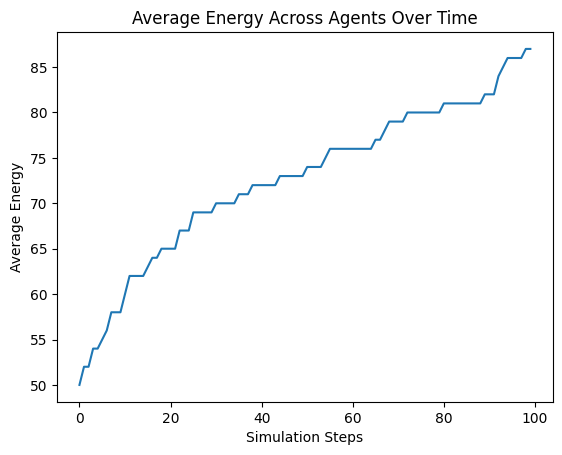

In [4]:
plt.plot(energy_levels)
plt.title("Average Energy Across Agents Over Time")
plt.xlabel("Simulation Steps")
plt.ylabel("Average Energy")
plt.show()
